In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df=pd.read_csv('datasets/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


[]

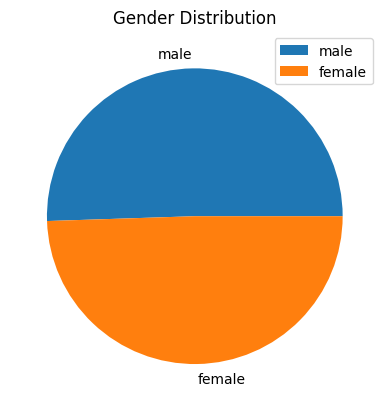

In [31]:
plt.pie(df['sex'].value_counts(),labels=df['sex'].value_counts().index)
plt.title('Gender Distribution')
plt.legend()
plt.plot()

[]

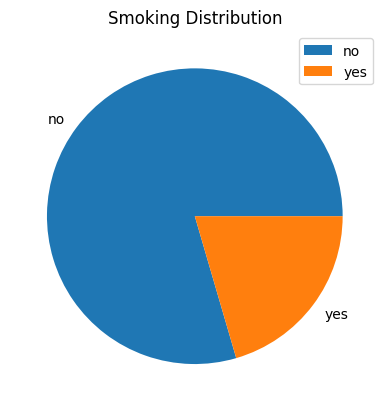

In [32]:
plt.pie(df['smoker'].value_counts(),labels=df['smoker'].value_counts().index)
plt.title('Smoking Distribution')
plt.legend()
plt.plot()

[]

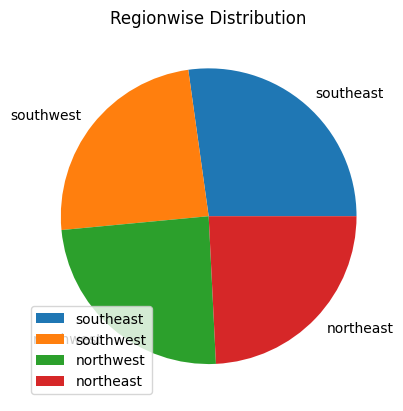

In [33]:
plt.pie(df['region'].value_counts(),labels=df['region'].value_counts().index)
plt.title('Regionwise Distribution')
plt.legend()
plt.plot()

[]

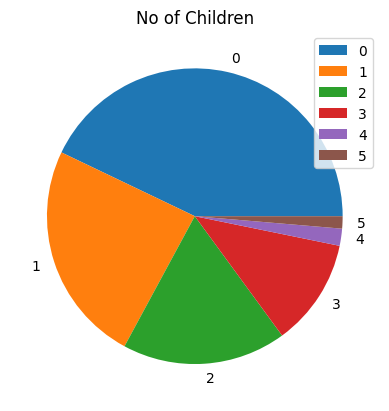

In [34]:
plt.pie(df['children'].value_counts(),labels=df['children'].value_counts().index)
plt.title('No of Children')
plt.legend()
plt.plot()

C:\Users\User\AppData\Local\Temp\ipykernel_18584\2799180019.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


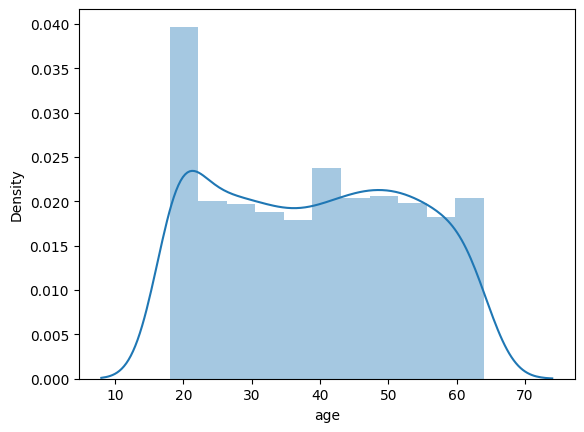

In [35]:
sns.distplot(df['age'])
plt.show()

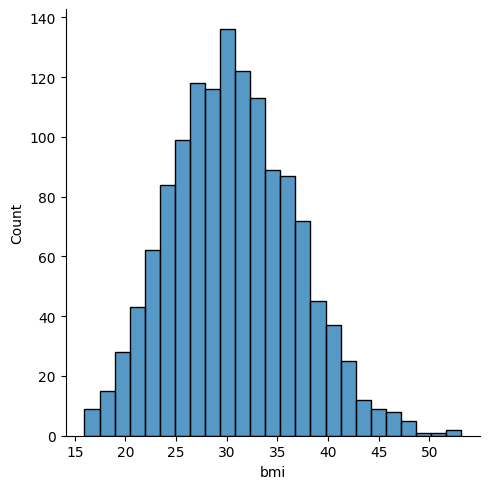

In [36]:
sns.displot(df['bmi'])
plt.show()

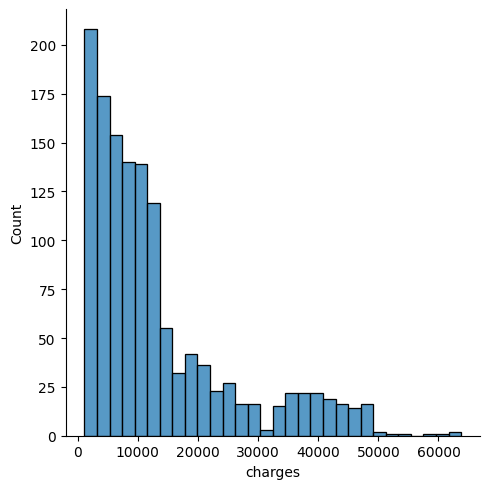

In [37]:
sns.displot(df['charges'])
plt.show()

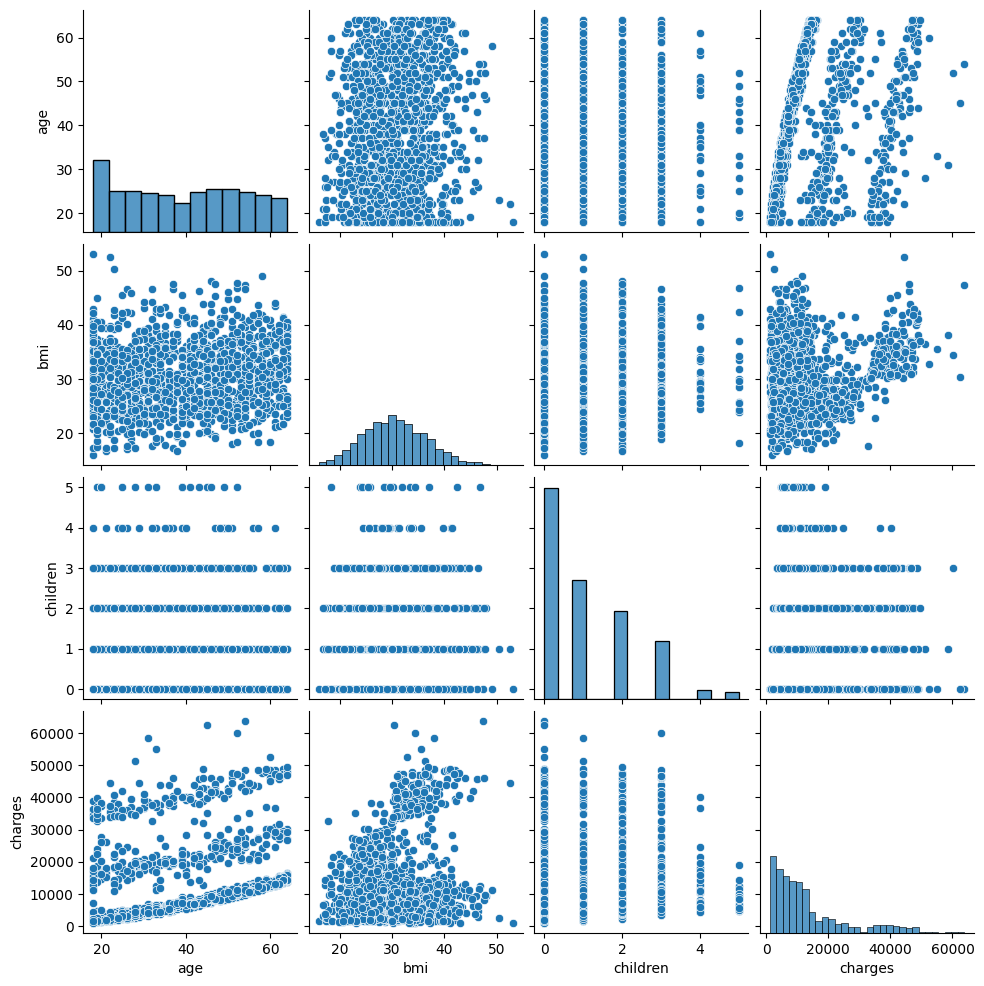

In [47]:
sns.pairplot(df)
plt.show()

In [48]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
df['smoker']=le.fit_transform(df['smoker'])
df['region']=le.fit_transform(df['region'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


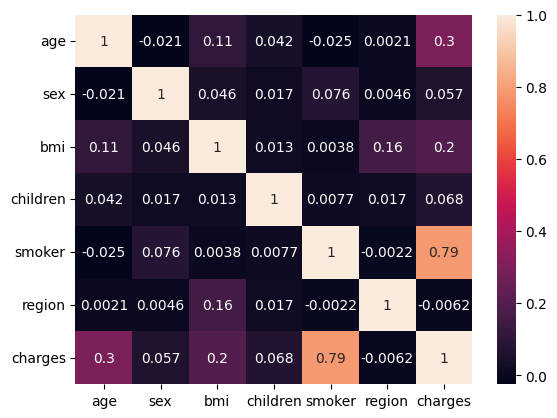

In [50]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [56]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [58]:
model=LinearRegression()
model.fit(x,y)
print('Score: ',model.score(x,y))
y_pred=model.predict(x)
print("MSE: ",mean_squared_error(y_pred,y))

Score:  0.7507372027994937
MSE:  36527659.88568238


In [59]:
x=df.iloc[:,:-2]
y=df.iloc[:,-1]

In [60]:
model=LinearRegression()
model.fit(x,y)
print('Score: ',model.score(x,y))
y_pred=model.predict(x)
print("MSE: ",mean_squared_error(y_pred,y))

Score:  0.7497225098709179
MSE:  36676355.79457731


In [61]:
from sklearn.linear_model import Ridge
model=Ridge()
model.fit(x,y)
print('Score: ',model.score(x,y))
y_pred=model.predict(x)
print("MSE: ",mean_squared_error(y_pred,y))

Score:  0.7497092541896945
MSE:  36678298.31877556


In [63]:
from sklearn.linear_model import Lasso
model=Lasso()
model.fit(x,y)
print('Score: ',model.score(x,y))
y_pred=model.predict(x)
print("MSE: ",mean_squared_error(y_pred,y))

Score:  0.7497224297034895
MSE:  36676367.542534076


In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
import numpy as np

param_grid = {'alpha': [0.1, 1.0, 10.0]}

lasso = Lasso()
grid_search = GridSearchCV(lasso, param_grid, cv=5)

# Fit grid search to data
grid_search.fit(x,y)

# Get best parameters and best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate best model
best_model_score = best_model.score(x,y)

print("Best Parameters:", best_params)
print("Best Model Score:", best_model_score)


Best Parameters: {'alpha': 10.0}
Best Model Score: 0.7497144982410887
